# Displaying Results
This notebook displays the results discussed in chapter 4 of the thesis.  
**Note:**  
In order to show the plots created by plotly.express, you actually have to run the cell! The printed output and the displayed Dataframes stay there, once created by me.
## Requirements
To run the code below, the following python libraries are needed for import:

In [17]:
import pickle
import pandas as pd
from IPython.display import HTML
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### File Reading
This section loads and prepares all necessary dictionaries from files, for further use.

In [18]:
similarity_file = open("use/similarities_dict", "rb")
similarities = pickle.load(similarity_file)
pronoun_file = open("someones_dict", "rb")
pronoun_dictionary = pickle.load(pronoun_file)
#print(len(similarities))
storyDict_file = open("storyDict_file", "rb")
storyDict = pickle.load(storyDict_file)

similarities_with_authors = {}
coordinate = 0
for story in storyDict.values():
    key = story["title"]
    author = story["author"]
    if key in similarities:
        score = similarities[key]
        similarities_with_authors[str(coordinate)+": "+author+" - "+key] = score
        coordinate += 1

## USE Document Similarity Measurement
The following method uses the similarity scores between documents calculated with the latest pre-trained model of the [Universal Sentence Encoder 4](https://tfhub.dev/google/universal-sentence-encoder/4), developed by Google. The code producing the previously loaded dictionary ```similarities``` can be found as ```process_use_similarity.py``` in my repository and was adapted from [this experiment](https://github.com/massanishi/document_similarity_algorithms_experiments/tree/master/use) by Masatoshi Nishimura.

### Focus on the eerie Stories
For the sake of a better visualization, I chose to show only the similarity scores of the stories previously classified as _eerie_ in a heatmap, before showing the full corpus.

In [4]:
eerie_Stories = [
	"The Birds",
    "A View from a Hill",
	"A Warning to the Curious",
	"Canon Alberic’s Scrap-book",
	"Lost Hearts",
	"The Mezzotint",
	"The Ash-tree",
	"Number 13",
	"Count Magnus",
	"“Oh, Whistle, and I’ll Come to You, My Lad”",
	"The Treasure of Abbot Thomas",
	"A School Story",
	"The Rose Garden",
	"The Tractate Middoth",
	"Casting the Runes",
	"The Stalls of Barchester Cathedral",
	"Martin's Close",
	"Mr Humphreys and his Inheritance",
	"Picnic at Hanging Rock",
	"The Affirmation",
	"The Glamour",
	"Red Shift"
] # The story titles need to be written in the same order as they appear in the corpus overview tsv

eerieStoryIndexes = {}
for i, key in enumerate(similarities.keys()):
    if key in eerie_Stories:
        eerieStoryIndexes[key] = i
eerie_similarities = {}
for k in similarities.keys():
    if k in eerie_Stories:
        all_similarities = similarities[k]
        eerie_sim_list = []
        for title in eerie_Stories:
            index = eerieStoryIndexes[title]
            eerie_sim_list.append(all_similarities[index])
        eerie_similarities[k] = eerie_sim_list

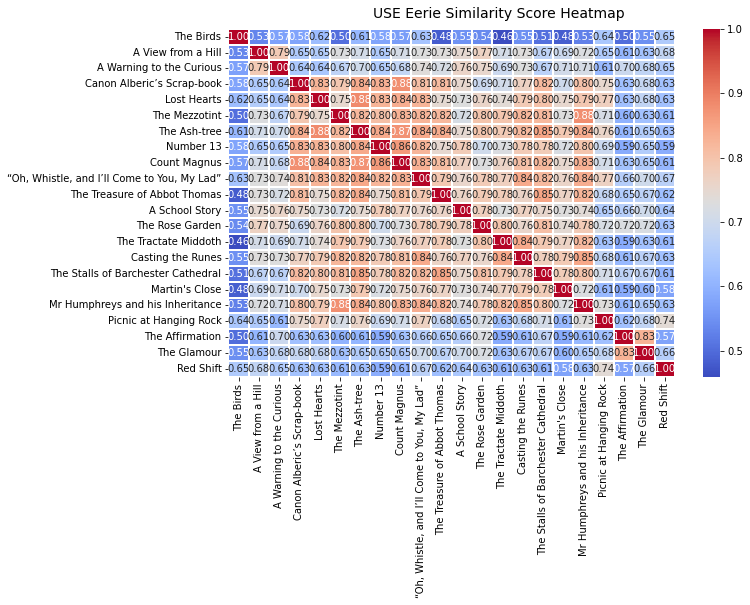

In [32]:
# making the heatmap from a dataframe
similarity_df = pd.DataFrame(data=eerie_similarities, index = eerie_similarities.keys())
f, ax = plt.subplots(figsize=(10, 6))
hm = sns.heatmap(similarity_df, annot=True, ax=ax, cmap="coolwarm",fmt='.2f',linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('USE Eerie Similarity Score Heatmap', fontsize=14)

### Showing the heatmap of the full corpus
The cluster of stories by Montague Rhodes James, starting with _A View from a Hill_ (29|29) and ending with _Mr Humphreys and his Inheritance_ (45|45) can be found in the upper left corner, however, the Heatmap is not very concise. To display information about the coordinates, the story titles and the similarity score, hover over the point you want to explore on the heatmap.

In [19]:
similarity_df = pd.DataFrame(data=similarities_with_authors, index = similarities_with_authors.keys())
print("Coordinates of the eerie Stories:")
for key in similarities_with_authors.keys():
    for story in eerie_Stories:
        if story in key and key.find("The Glamour Of The Snow") == -1:
            coordinate = key.split(":")[0]
            print(coordinate+"|"+coordinate+": "+story)


fig = px.imshow(similarity_df, labels=dict(color="similarity score"))
fig.layout.height = 950
fig.layout.width = 950
#fig.update_layout(coloraxis_showscale=False)
fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.show()

Coordinates of the eerie Stories:
11|11: The Birds
29|29: A View from a Hill
30|30: A Warning to the Curious
31|31: Canon Alberic’s Scrap-book
32|32: Lost Hearts
33|33: The Mezzotint
34|34: The Ash-tree
35|35: Number 13
36|36: Count Magnus
37|37: “Oh, Whistle, and I’ll Come to You, My Lad”
38|38: The Treasure of Abbot Thomas
39|39: A School Story
40|40: The Rose Garden
41|41: The Tractate Middoth
42|42: Casting the Runes
43|43: The Stalls of Barchester Cathedral
44|44: Martin's Close
45|45: Mr Humphreys and his Inheritance
105|105: Picnic at Hanging Rock
106|106: The Affirmation
107|107: The Glamour
108|108: Red Shift


### Comparing Lovecraft to the eerie stories

In [20]:
# How to view the keys to Lovecraft's stories
for k, v in similarities_with_authors.items():
    if "Lovecraft" in k:
        print(k)
        
# Take any of the printed answers, example is given with "Cool Air"
lovecraft_similarities = similarities_with_authors["6: H.P. Lovecraft - Cool Air"]
for title, index in eerieStoryIndexes.items():
    print("Similarity with", title, ": "+str(lovecraft_similarities[index]))

2: H.P. Lovecraft - At the Mountains of Madness
3: H.P. Lovecraft - The Dunwich Horror
4: H.P. Lovecraft - The Shunned House
5: H.P. Lovecraft - Herbert West: Reanimator
6: H.P. Lovecraft - Cool Air
7: H. P. Lovecraft - The Call of Cthulhu
Similarity with The Birds : 0.53808093
Similarity with A View from a Hill : 0.5851808
Similarity with A Warning to the Curious : 0.57566786
Similarity with Canon Alberic’s Scrap-book : 0.725514
Similarity with Lost Hearts : 0.77435493
Similarity with The Mezzotint : 0.6552983
Similarity with The Ash-tree : 0.7529321
Similarity with Number 13 : 0.7431146
Similarity with Count Magnus : 0.7165887
Similarity with “Oh, Whistle, and I’ll Come to You, My Lad” : 0.76731133
Similarity with The Treasure of Abbot Thomas : 0.71885
Similarity with A School Story : 0.7044651
Similarity with The Rose Garden : 0.67691493
Similarity with The Tractate Middoth : 0.6222726
Similarity with Casting the Runes : 0.675198
Similarity with The Stalls of Barchester Cathedral : 

## Eerieness Score from Pronouns
The following code displays the **Eerieness Score** for each document in my corpus, based on the occurences of a few selected indefinite pronouns.

The key of each item in ```pronoun_dictionary``` is the document title, the value is a list consisting of two elements, the name of the author and the calculated eerieness score.

### Constructing a Dataframe
Here, two _pandas_ Dataframes are constructed. One Dataframe has four columns: rank, author, the document title and the eerieness score. The other Dataframe has two columns, author and title of each text packed in one column, and the eerieness score in the other column, to display it more conveniently in plotly. 

In [21]:
authors = []
scores = []
authorAndTitle = []
for key, authorValue in pronoun_dictionary.items():
    authors.append(authorValue[0])
    scores.append(authorValue[1])
    authorAndTitle.append(authorValue[0]+" - "+key)
d = {"Rank": range(1, len(authors)+1), "Author": authors, "Title": pronoun_dictionary.keys(), "Score": scores}
d_compact = {"Author and Title": authorAndTitle, "Score": scores}
df = pd.DataFrame(data=d)

### Making the Plot
The plot shows all texts as dots, the eerieness score being the y-axis, in descending order. Hovering over one dot shows information about author, title and eerieness score.

In [22]:
plot_df = pd.DataFrame(data=d_compact)
fig = px.scatter(plot_df, y="Score", x="Author and Title", color="Score")
fig.update_xaxes(visible=False)
fig.show()

### Displaying the Dataframe directly
Options are set to display all 170 rows of the more comprehensible Dataframe in a nice way. The eerieness score is descending from the document with the highest score.

In [23]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
HTML(df.to_html(index=False))

Rank,Author,Title,Score
1,Mary E. Wilkins Freeman,The Shadows on the Wall,0.151786
2,nltk webtext corpus,singles.txt,0.142857
3,William Hope Hodgson,The Ghost Pirates,0.128342
4,M. R. James,The Rose Garden,0.127072
5,Christopher Priest,The Glamour,0.123560
6,M. R. James,A View from a Hill,0.116838
7,M. R. James,A School Story,0.114286
8,Daphne Du Maurier,The Birds,0.103604
9,Philip K. Dick,Beyond the Door,0.102941
10,nltk webtext corpus,overheard.txt,0.100588
